<a href="https://colab.research.google.com/github/muhammedafsalpm/Salary-Prediction-and-Job-Analysis-Using-Machine-Learning_Internship/blob/main/ICT_Internship_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Salary Prediction and Job Analysis Using Machine Learning**

# **Week 1: Data Understanding, Cleaning, and EDA**

Goal: Familiarize with the dataset, clean and preprocess the data, and perform exploratory
data analysis (EDA) to understand patterns and relationships.
1. Data Loading and Inspection:
- Load the dataset, examine columns, data types, and identify any missing or inconsistent
values.
- Convert data types where necessary (e.g., dates, categorical encoding).
2. Data Cleaning:
- Handle missing values through imputation or removal.
- Standardize categorical values.
- Ensure all salary values are in USD for consistency in analysis.
3. Exploratory Data Analysis (EDA):
- Generate descriptive statistics.
- Plot distribution of salaries by job_category, experience_level, work_setting, and
company_size.
4. Documentation:
- Summarize insights and challenges from the data cleaning and EDA phases.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1 Understanding the Data

In [ ]:
df = pd.read_csv('/content/dsa_job - data_science_job.csv')
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [ ]:
df.isna().sum()

,0
work_year,0
job_title,0
job_category,500
salary_currency,500
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


In [ ]:
df['employee_residence'].unique()

array(['US', 'JP', 'UK', 'DE', 'CN', 'MX', 'IN'], dtype=object)

In [ ]:
df['company_location'].unique()

array(['DE', 'IN', 'CN', 'MX', 'UK', 'JP', 'US'], dtype=object)

In [ ]:
df['job_title'].value_counts()

,count
job_title,
Data Engineer in office,372
Data Engineer,355
Statistician,354
Data Scientist,353
Data Analyst in office,339
Data Engineer (Remote),338
Data Analyst (Remote),336
Machine Learning Engineer in office,331
Data Scientist in office,330


In [ ]:
df['job_category'].value_counts()

,count
job_category,
Data Science,1173
ML/AI,1151
Analysis,1108
Engineering,1068


# 1.2 Data Cleaning and Data Transform

In [ ]:
import re

def categorize_job_category(job_title):
    if re.search(r'Data Analyst', job_title, re.IGNORECASE):
        return 'Analyst'
    elif re.search(r'Data Engineer', job_title, re.IGNORECASE):
        return 'Engineering'
    elif re.search(r'Data Scientist', job_title, re.IGNORECASE):
        return 'Data Science'
    elif re.search(r'Machine Learning Engineer', job_title, re.IGNORECASE):
        return 'ML/AI'
    elif re.search(r'Statistician', job_title, re.IGNORECASE):
        return 'Quantitative Analysis'
    else:
        return 'Other'

# Apply the function to categorize job titles
df['job_category'] = df['job_title'].apply(categorize_job_category)

In [ ]:
df[['job_title', 'job_category']].head(15)

,job_title,job_category
0,Machine Learning Engineer in office,ML/AI
1,Statistician (Remote),Quantitative Analysis
2,Machine Learning Engineer,ML/AI
3,Data Analyst in office,Analyst
4,Statistician,Quantitative Analysis
5,Machine Learning Engineer,ML/AI
6,Data Analyst in office,Analyst
7,Data Scientist (Remote),Data Science
8,Data Analyst,Analyst
9,Statistician (Remote),Quantitative Analysis


In [ ]:
def categorize_work_setting(job_title):
    if re.search(r'Remote', job_title, re.IGNORECASE):
        return 'Remote'
    elif re.search(r'office', job_title, re.IGNORECASE):
        return 'In-person'
    else:
        return 'Hybrid'

# Apply the function to categorize job titles
df['work_setting'] = df['job_title'].apply(categorize_work_setting)

In [ ]:
df[['job_title', 'work_setting']].head(15)

,job_title,work_setting
0,Machine Learning Engineer in office,In-person
1,Statistician (Remote),Remote
2,Machine Learning Engineer,Hybrid
3,Data Analyst in office,In-person
4,Statistician,Hybrid
5,Machine Learning Engineer,Hybrid
6,Data Analyst in office,In-person
7,Data Scientist (Remote),Remote
8,Data Analyst,Hybrid
9,Statistician (Remote),Remote


In [ ]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
df['company_location'].value_counts()

,count
company_location,
UK,789
DE,726
MX,713
IN,708
CN,697
US,684
JP,683


In [ ]:
df['salary_currency'].value_counts()

,count
salary_currency,
EUR,962
INR,916
JPY,891
us dolars,875
GBP,856


In [ ]:
def categorize_salary_currency(company_location):
    if re.search(r'UK', company_location, re.IGNORECASE):
        return 'GBP'
    elif re.search(r'DE', company_location, re.IGNORECASE):
        return 'EUR'
    elif re.search(r'MX', company_location, re.IGNORECASE):
        return 'MXN'
    elif re.search(r'IN', company_location, re.IGNORECASE):
        return 'INR'
    elif re.search(r'CN', company_location, re.IGNORECASE):
        return 'CNY'
    elif re.search(r'US', company_location, re.IGNORECASE):
        return 'USD'
    else:
        return 'JPY'

# Apply the function to categorize job titles
df['salary_currency'] = df['company_location'].apply(categorize_salary_currency)

In [ ]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,ML/AI,EUR,186597,136086,US,MI,CT,In-person,DE,L
1,2020,Statistician (Remote),Quantitative Analysis,INR,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,CNY,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,Analyst,MXN,154130,135242,DE,SE,FT,In-person,MX,L
4,2020,Statistician,Quantitative Analysis,GBP,172312,35156,UK,MI,FT,Hybrid,UK,S


In [ ]:
df.isna().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


In [ ]:
df['company_size'].value_counts()

,count
company_size,
S,1519
M,1517
L,1464


In [ ]:
df['experience_level'].value_counts()

,count
experience_level,
SE,1154
EX,1119
EN,1115
MI,1112


In [ ]:
# Fill missing values in 'company_size' with the mode of the column
company_size_mode = df['company_size'].mode()[0]
df['company_size'] = df['company_size'].fillna(company_size_mode)

# Fill missing values in 'experience_level' with the mode of the column
experience_level_mode = df['experience_level'].mode()[0]
df['experience_level'] = df['experience_level'].fillna(experience_level_mode)

# Display the updated DataFrame to check
print(df[['company_size', 'experience_level']].isna().sum())  # To verify no NaN values remain


company_size        0
experience_level    0
dtype: int64


In [ ]:
df.isna().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,0
employment_type,0
work_setting,0


In [ ]:
# Replace '-' with an empty string in 'salary_in_usd' and convert to numeric
df['salary'] = df['salary'].astype(str).str.replace('-', '', regex=False)
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')


In [ ]:
df.head(20)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,ML/AI,EUR,186597,136086,US,MI,CT,In-person,DE,L
1,2020,Statistician (Remote),Quantitative Analysis,INR,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,CNY,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,Analyst,MXN,154130,135242,DE,SE,FT,In-person,MX,L
4,2020,Statistician,Quantitative Analysis,GBP,172312,35156,UK,MI,FT,Hybrid,UK,S
5,2020,Machine Learning Engineer,ML/AI,EUR,36544,68280,CN,MI,FT,Hybrid,DE,M
6,2022,Data Analyst in office,Analyst,EUR,178404,105324,DE,EX,PT,In-person,DE,L
7,2021,Data Scientist (Remote),Data Science,JPY,187908,90706,UK,EX,CT,Remote,JP,M
8,2022,Data Analyst,Analyst,EUR,44388,171043,UK,SE,FL,Hybrid,DE,S
9,2022,Statistician (Remote),Quantitative Analysis,USD,31694,73408,DE,EN,CT,Remote,US,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        5000 non-null   object
 3   salary_currency     5000 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    5000 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        5000 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


# 1.3 Univariate Analysis

In [ ]:
cat_cols=[col for col in df.columns if df[col].dtype=='object']
cat_cols

['job_title',
 'job_category',
 'salary_currency',
 'employee_residence',
 'experience_level',
 'employment_type',
 'work_setting',
 'company_location',
 'company_size']

In [ ]:
num_cols=[col for col in df.columns if df[col].dtype !='object']
num_cols

['work_year', 'salary', 'salary_in_usd']

Categorical Columns

                                      job_title  Ratio
job_title                                             
Data Engineer  in office                    372   7.44
Data Engineer                               355   7.10
Statistician                                354   7.08
Data Scientist                              353   7.06
Data Analyst  in office                     339   6.78
Data Engineer  (Remote)                     338   6.76
Data Analyst  (Remote)                      336   6.72
Machine Learning Engineer  in office        331   6.62
Data Scientist  in office                   330   6.60
Machine Learning Engineer  (Remote)         327   6.54
Statistician  (Remote)                      323   6.46
Statistician  in office                     317   6.34
Data Scientist  (Remote)                    310   6.20
Data Analyst                                309   6.18
Machine Learning Engineer                   306   6.12

##########################################



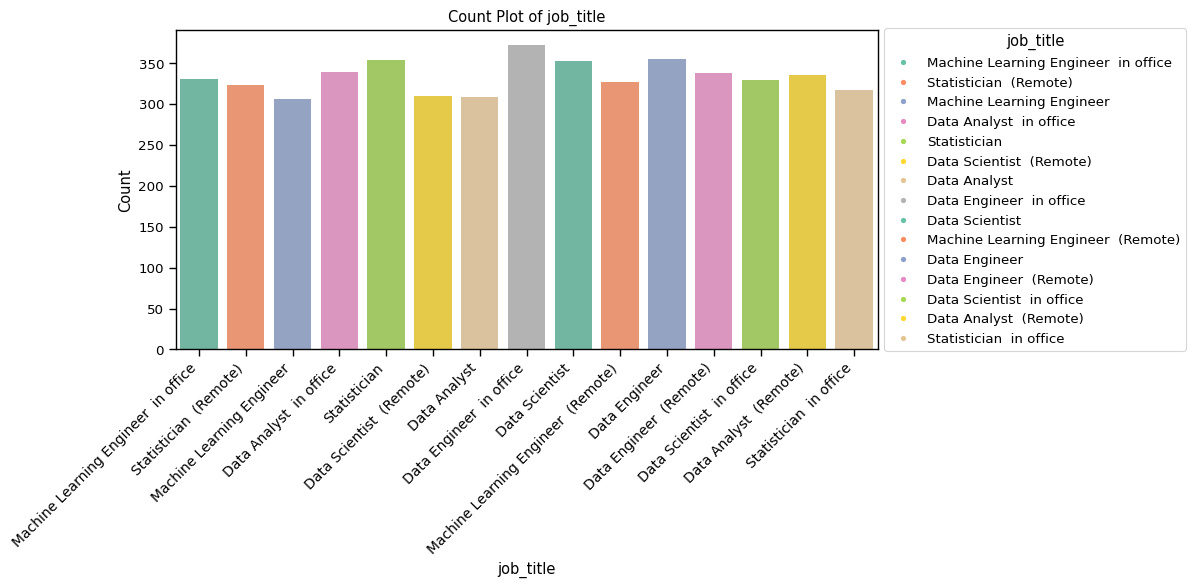

                       job_category  Ratio
job_category                              
Engineering                    1065  21.30
Quantitative Analysis           994  19.88
Data Science                    993  19.86
Analyst                         984  19.68
ML/AI                           964  19.28

##########################################



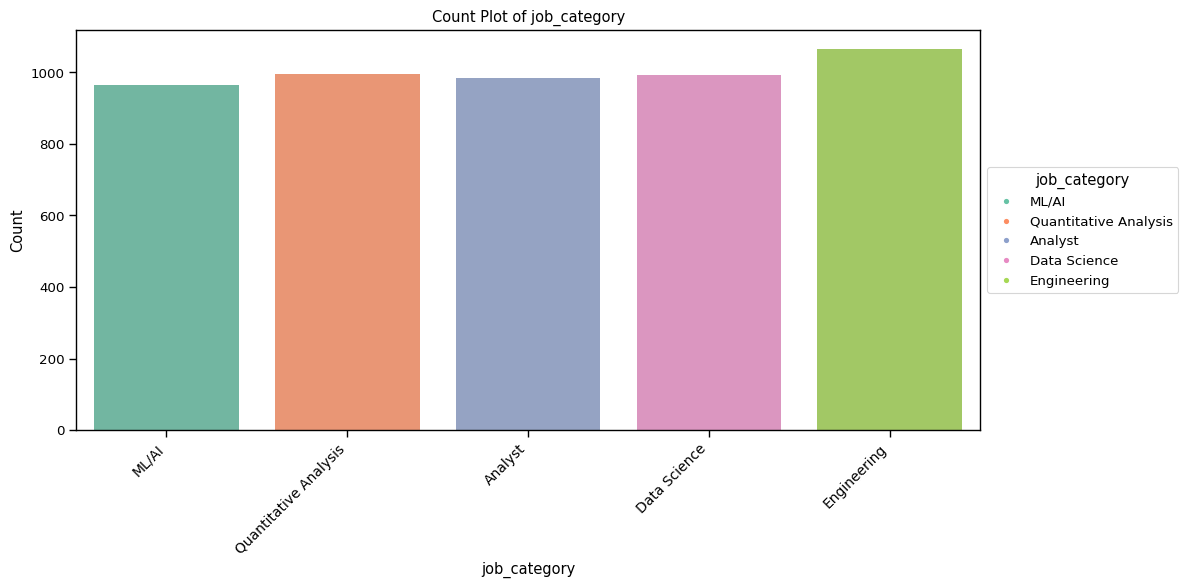

                 salary_currency  Ratio
salary_currency                        
GBP                          789  15.78
EUR                          726  14.52
MXN                          713  14.26
INR                          708  14.16
CNY                          697  13.94
USD                          684  13.68
JPY                          683  13.66

##########################################



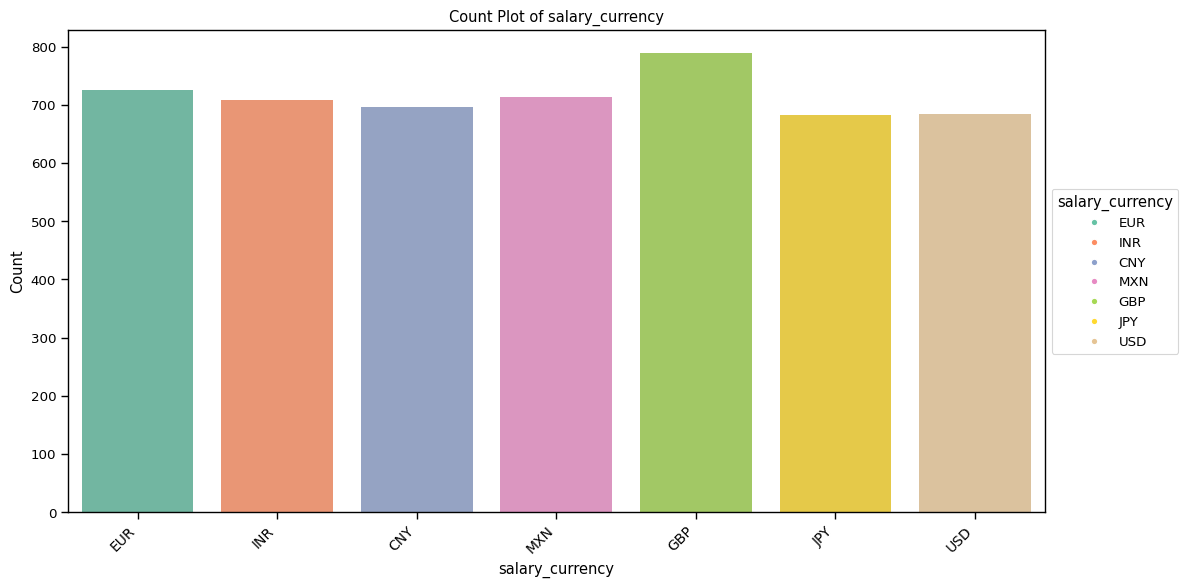

                    employee_residence  Ratio
employee_residence                           
JP                                 783  15.66
IN                                 741  14.82
US                                 721  14.42
DE                                 706  14.12
MX                                 705  14.10
CN                                 674  13.48
UK                                 670  13.40

##########################################



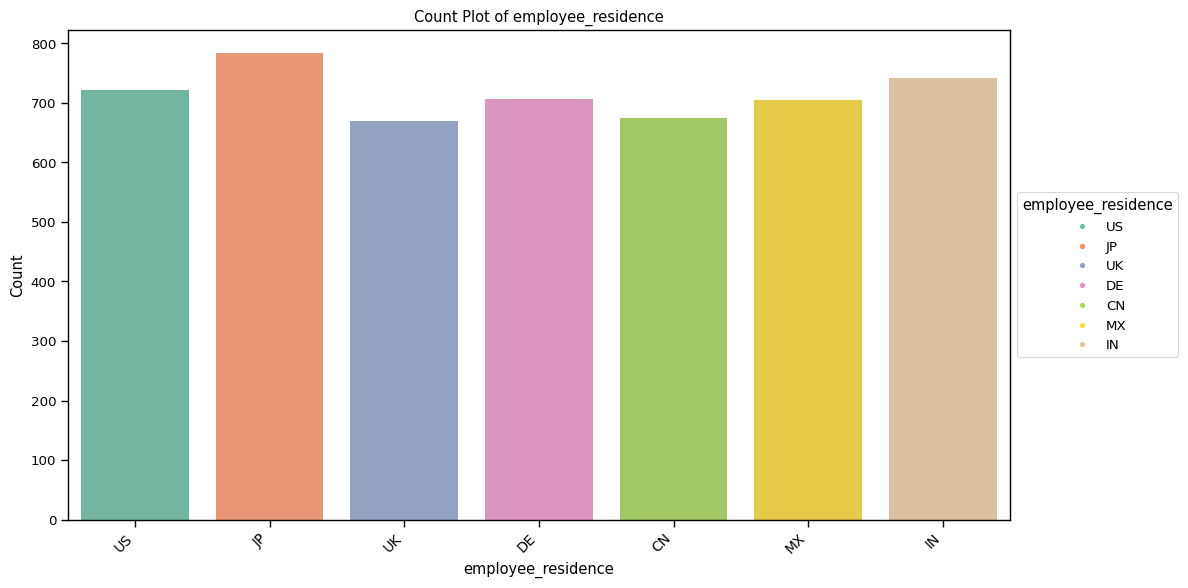

                  experience_level  Ratio
experience_level                         
SE                            1654  33.08
EX                            1119  22.38
EN                            1115  22.30
MI                            1112  22.24

##########################################



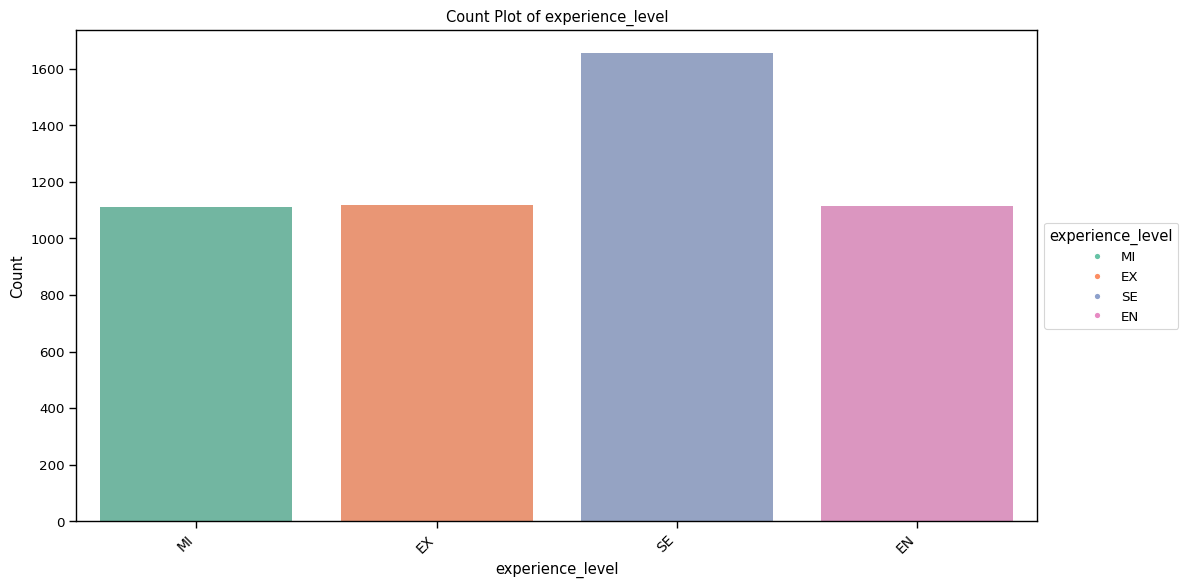

                 employment_type  Ratio
employment_type                        
PT                          1268  25.36
FL                          1263  25.26
FT                          1245  24.90
CT                          1224  24.48

##########################################



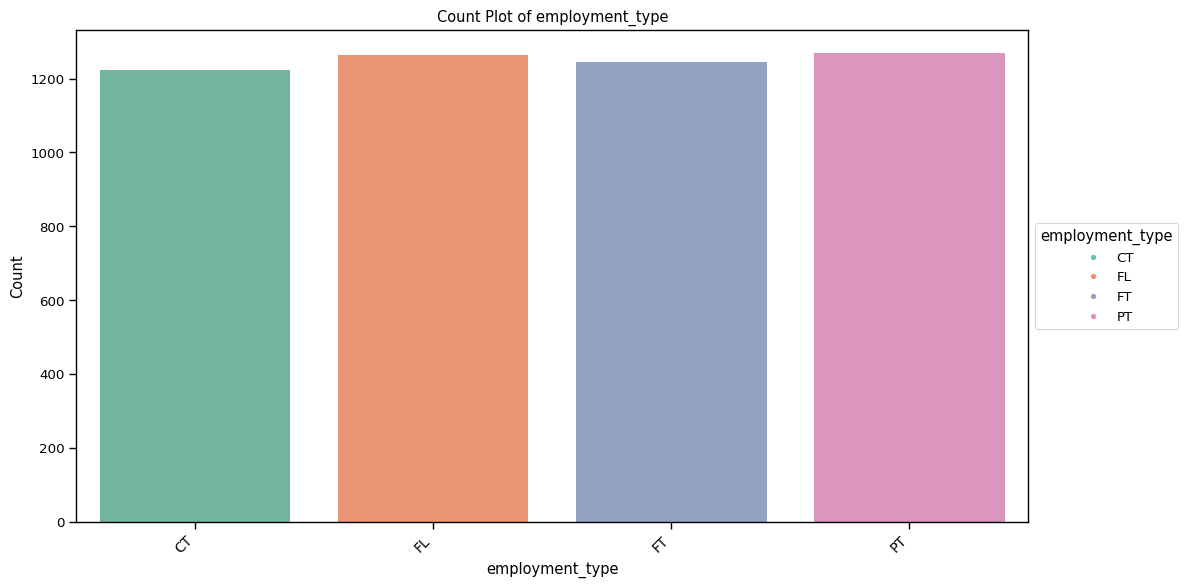

              work_setting  Ratio
work_setting                     
In-person             1689  33.78
Hybrid                1677  33.54
Remote                1634  32.68

##########################################



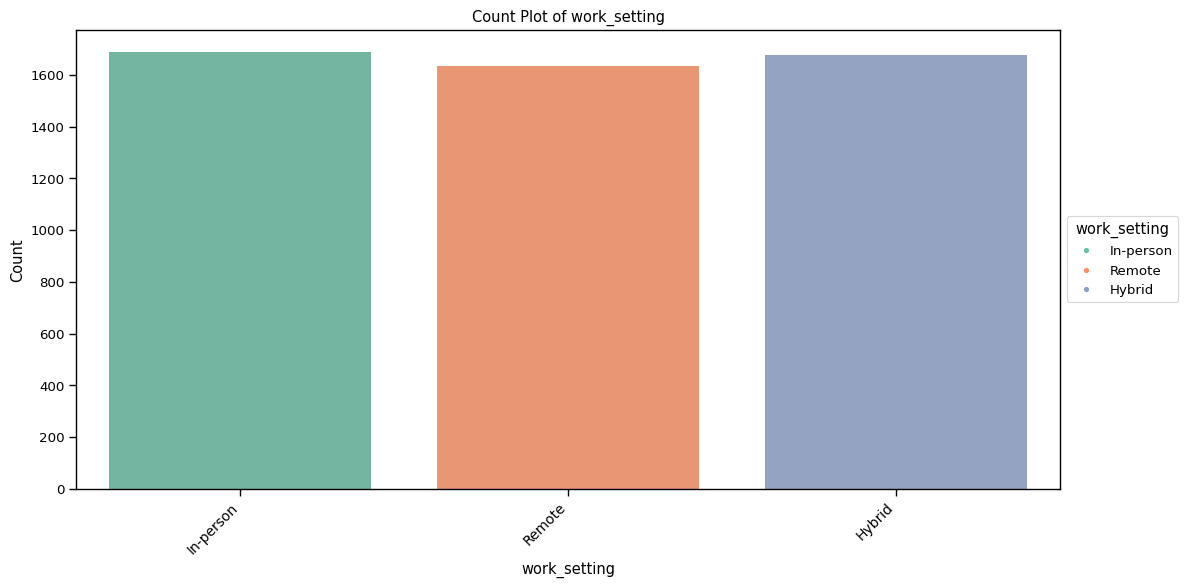

                  company_location  Ratio
company_location                         
UK                             789  15.78
DE                             726  14.52
MX                             713  14.26
IN                             708  14.16
CN                             697  13.94
US                             684  13.68
JP                             683  13.66

##########################################



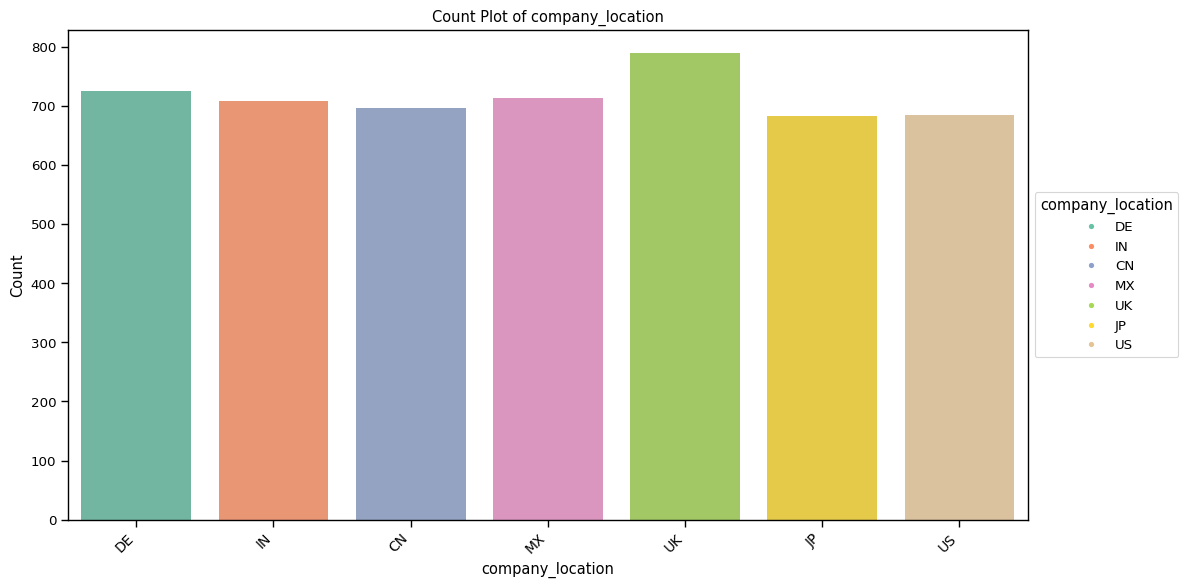

              company_size  Ratio
company_size                     
S                     2019  40.38
M                     1517  30.34
L                     1464  29.28

##########################################



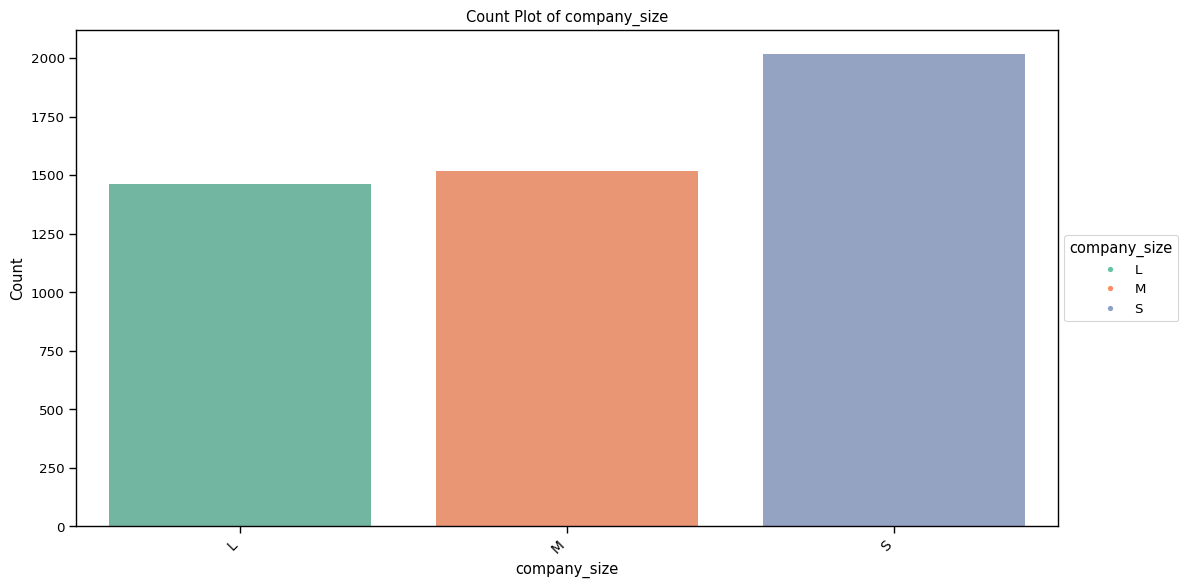

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    # Print summary table of value counts and their ratios
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("\n##########################################\n")

    # Plot if plot=True
    if plot:
        # Set color palette size based on unique values in col_name
        unique_values = dataframe[col_name].unique()
        palette = sns.color_palette("Set2", n_colors=len(unique_values))

        # Increase figure size for readability
        plt.figure(figsize=(12, 6))

        # Count plot with col_name as hue and legend set to False
        ax = sns.countplot(x=col_name, data=dataframe, hue=col_name, palette=palette, legend=False)

        # Set labels and title
        plt.xlabel(col_name)
        plt.ylabel("Count")
        plt.title(f"Count Plot of {col_name}")

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right', fontsize=10) # Adjust fontsize if needed

        # Manually create the legend
        handles = [plt.Line2D([0], [0], marker='o', color='w', label=value, markerfacecolor=palette[i])
                   for i, value in enumerate(unique_values)]

        # Adjust legend position to the right side of the plot
        plt.legend(title=col_name, handles=handles, loc="center left", bbox_to_anchor=(1, 0.5))

        # Adjust layout to prevent clipping
        plt.tight_layout()
        plt.show()

# Assuming cat_cols is a list of categorical columns
for col in cat_cols:
    cat_summary(df, col, plot=True)

Numerical Columns


*************** work_year ***************

count    5000.00000
mean     2020.97680
std         0.81951
min      2020.00000
25%      2020.00000
50%      2021.00000
75%      2022.00000
max      2022.00000
Name: work_year, dtype: float64


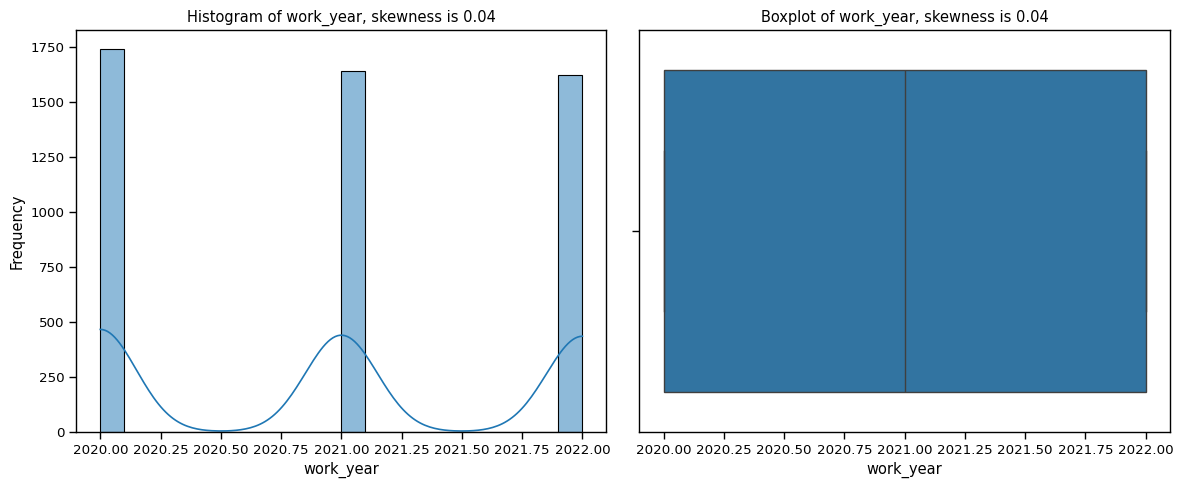


*************** salary ***************

count      5000.000000
mean     114201.052800
std       48900.704986
min       30018.000000
25%       71946.500000
50%      115008.500000
75%      155858.750000
max      199924.000000
Name: salary, dtype: float64


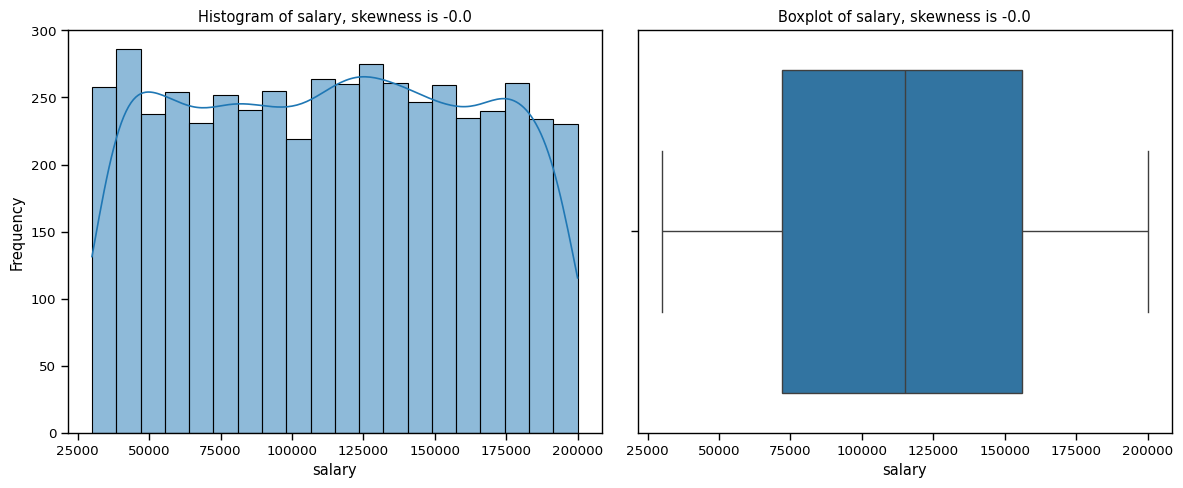


*************** salary_in_usd ***************

count      5000.000000
mean     114076.995800
std       49113.807687
min       30016.000000
25%       71343.750000
50%      114167.000000
75%      156665.750000
max      199985.000000
Name: salary_in_usd, dtype: float64


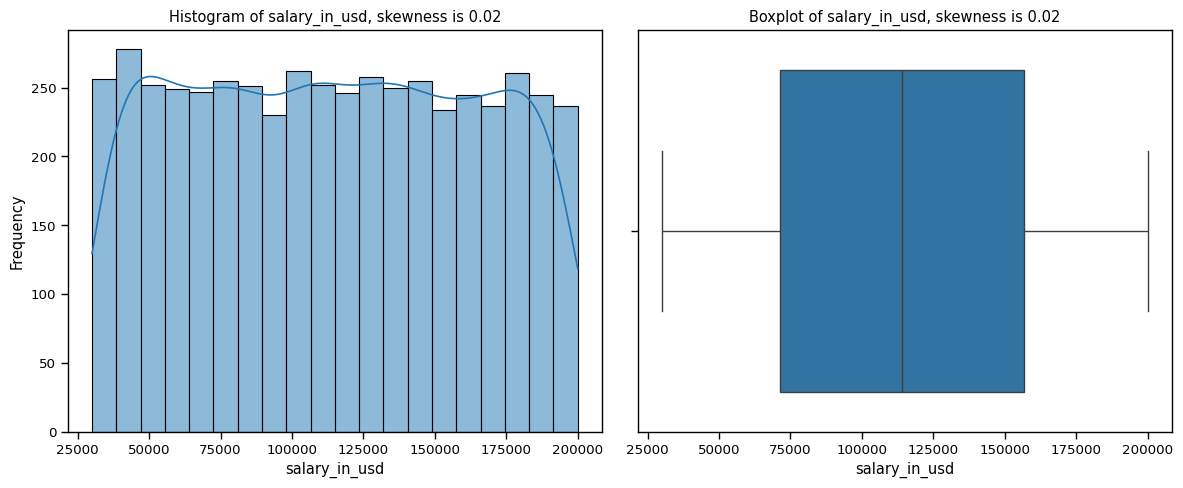

In [ ]:
def num_summary(dataframe, numerical_col):
    print('\n***************', numerical_col, '***************\n')
    print(dataframe[numerical_col].describe())

def univariate_plots(dataframe, numerical_cols):
    for col in numerical_cols:
        # Call num_summary to print statistics
        num_summary(dataframe, col)

        # Create a figure for the histogram
        plt.figure(figsize=(12, 5))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[col], bins=20, kde=True)
        plt.title(f'Histogram of {col}, skewness is {round(dataframe[col].skew(), 2)}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=dataframe[col])
        plt.title(f'Boxplot of {col}, skewness is {round(dataframe[col].skew(), 2)}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

# List of numerical columns to plot
num_cols = ['work_year', 'salary', 'salary_in_usd']

# Generate univariate plots
univariate_plots(df, num_cols)

# 1.4 Bivariate Analysis

Categorical Columns

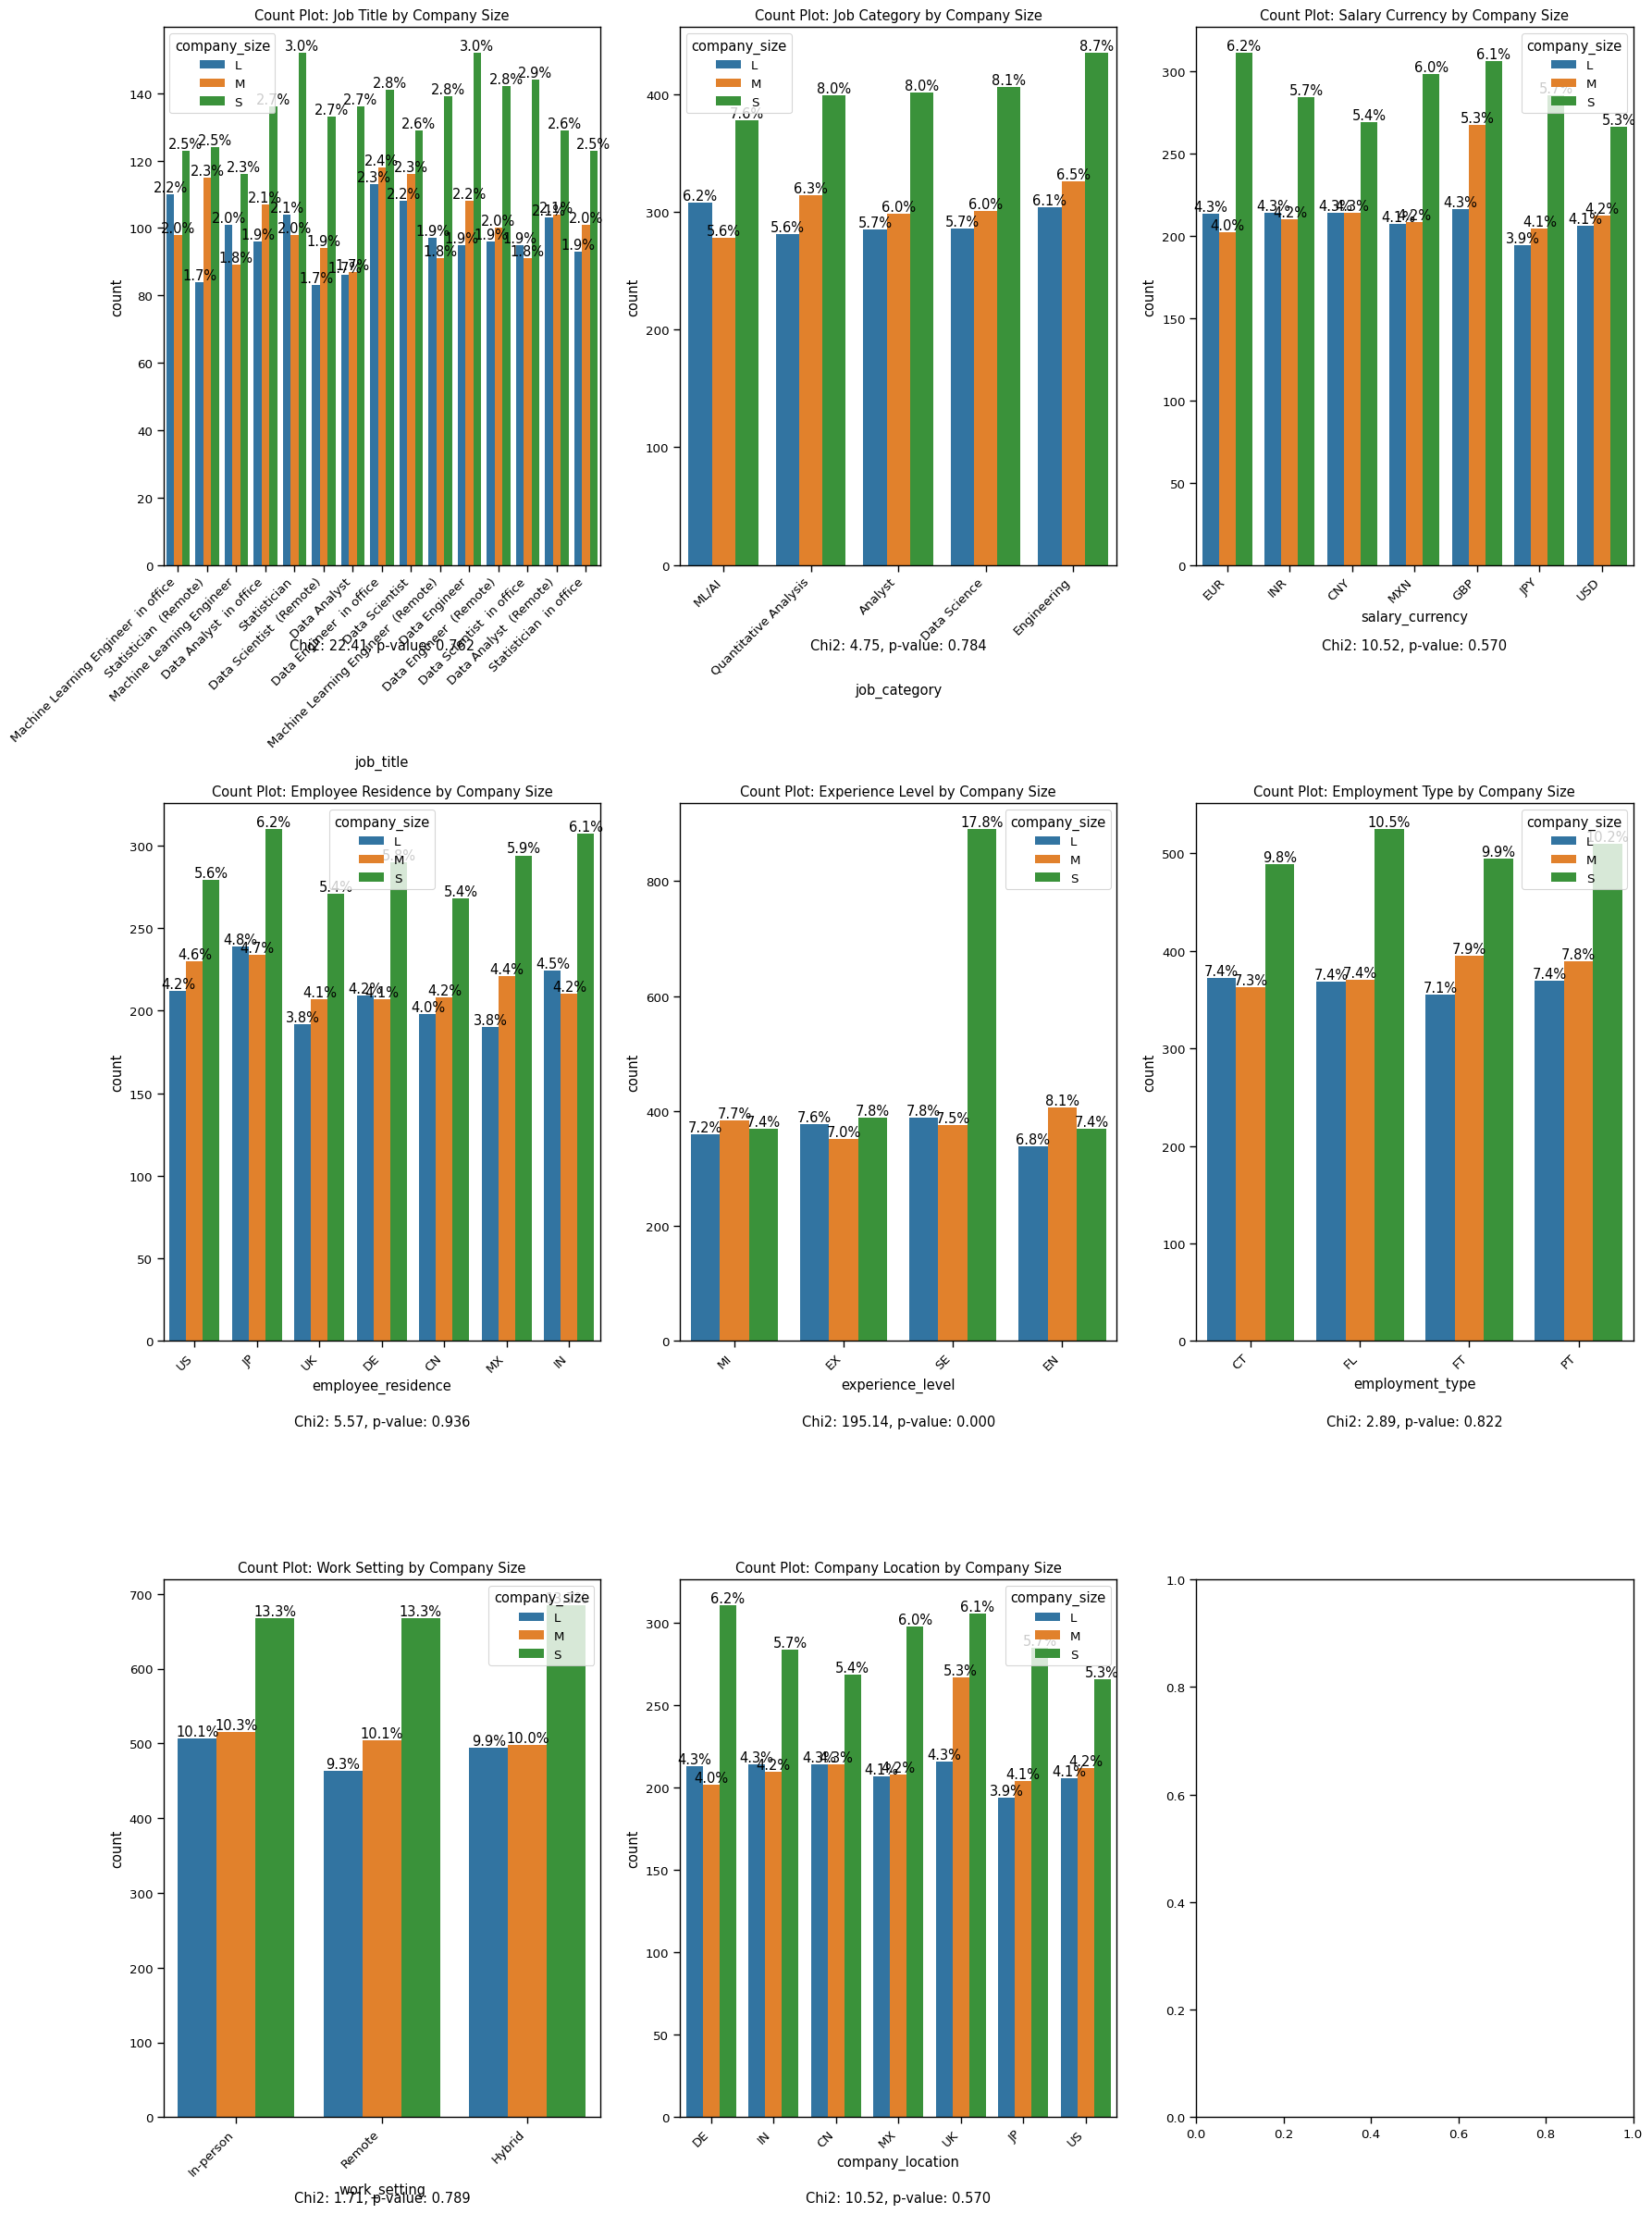

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate Chi-Square and p-value
def chi_square_test(dataframe, feature, target):
    contingency_table = pd.crosstab(dataframe[feature], dataframe[target])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return chi2, p

# List of features to plot, adjusted to your dataset
features = [
    ('job_title', 'Count Plot: Job Title by Company Size'),
    ('job_category', 'Count Plot: Job Category by Company Size'),
    ('salary_currency', 'Count Plot: Salary Currency by Company Size'),
    ('employee_residence', 'Count Plot: Employee Residence by Company Size'),
    ('experience_level', 'Count Plot: Experience Level by Company Size'),
    ('employment_type', 'Count Plot: Employment Type by Company Size'),
    ('work_setting', 'Count Plot: Work Setting by Company Size'),
    ('company_location', 'Count Plot: Company Location by Company Size')
]

# Create subplots with enough space
fig, axes = plt.subplots(3, 3, figsize=(18, 24)) # Adjusted grid size for 8 features

# Loop through the features for count plots
for i, (feature, title) in enumerate(features):
    ax = axes[i // 3, i % 3] # Determine the correct subplot
    sns.countplot(data=df, x=feature, hue='company_size', ax=ax)
    ax.set_title(title)

    # Calculate total counts for percentages
    total = len(df)

    # Add percentage annotations on top of the bars
    for p in ax.patches:
        height = p.get_height()
        if height == 0: # Skip if the bar height is 0 (0.0%)
            continue
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')

    # Perform Chi-Square test and get results
    chi2, p = chi_square_test(df, feature, 'company_size')
    ax.text(0.5, -0.15, f'Chi2: {chi2:.2f}, p-value: {p:.3f}', ha='center', va='center', transform=ax.transAxes)

    # Use plt.xticks() for proper x-tick label rotation if needed
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


Numerical Columns

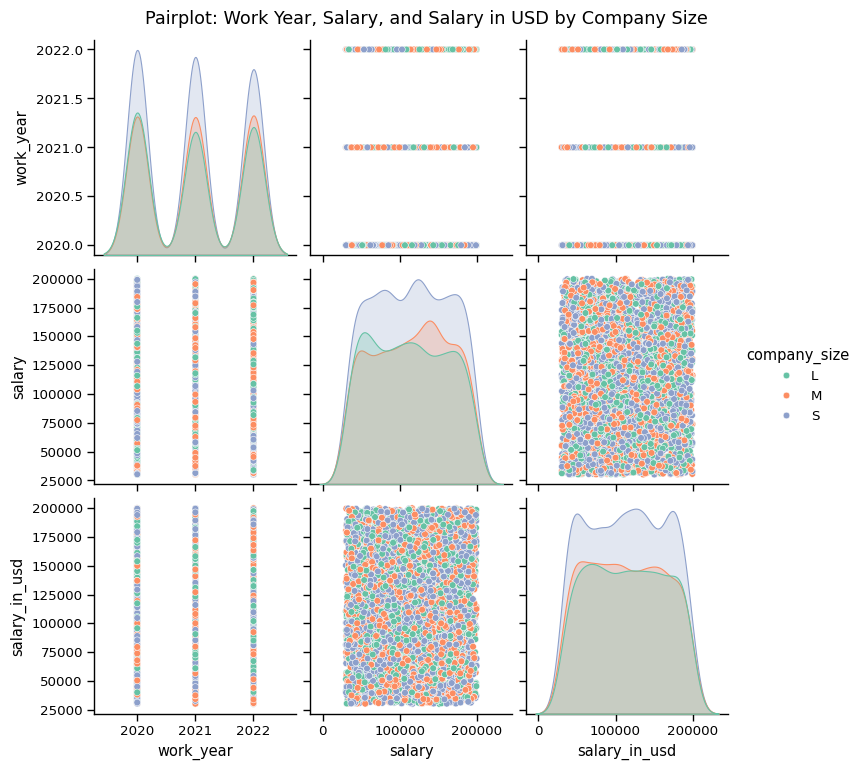

In [ ]:
# Create a DataFrame for the selected columns
plot_data = df[['work_year', 'salary', 'salary_in_usd', 'company_size']]

# Set the context for the plot
sns.set_context("paper", font_scale=1.1)

# Create pairplot
pair_plot = sns.pairplot(plot_data, hue='company_size', palette="Set2")

# Set titles
pair_plot.fig.suptitle('Pairplot: Work Year, Salary, and Salary in USD by Company Size', y=1.02)

# Show the plot
plt.show()


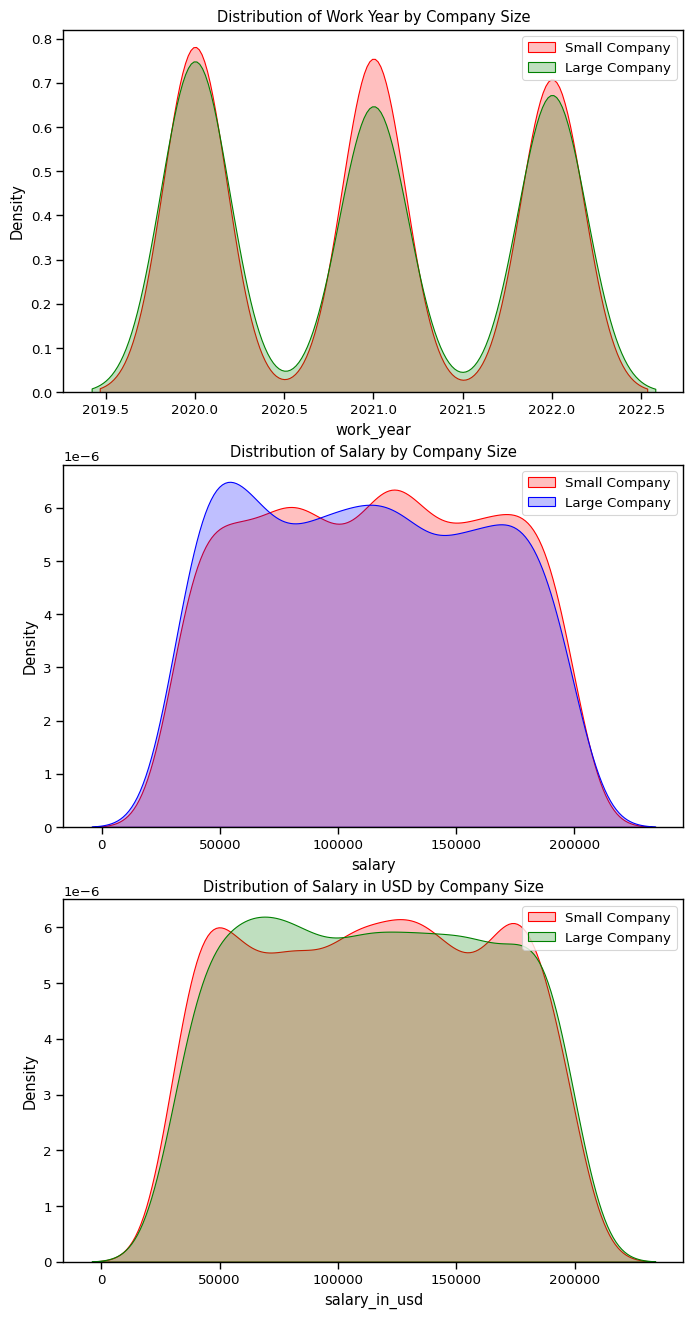

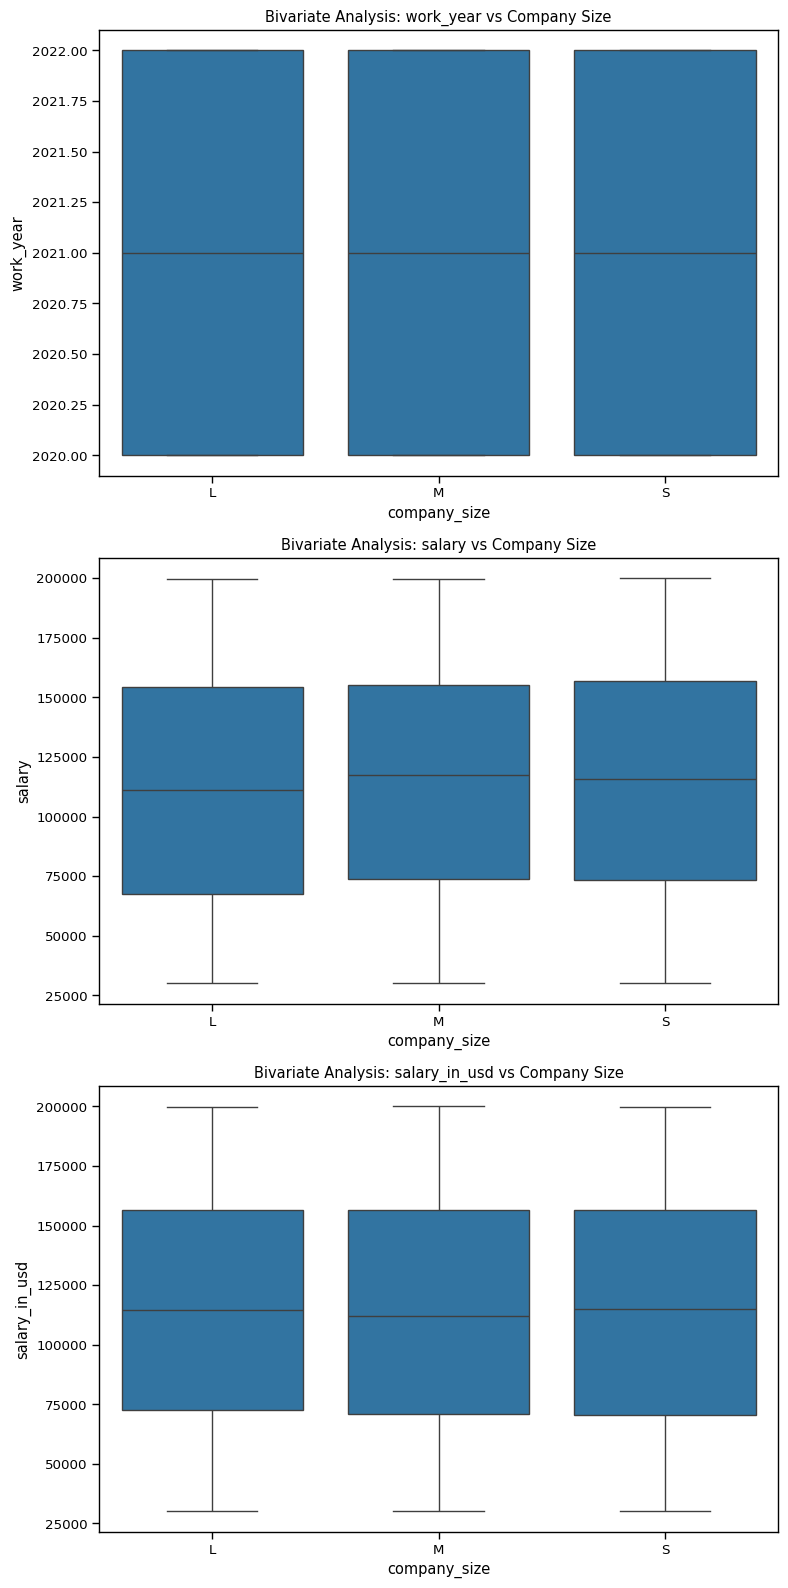

In [ ]:
sns.set_context("paper", font_scale=1.1)

features = [
    ('work_year', 'Red', 'Green', 'Distribution of Work Year by Company Size'),
    ('salary', 'Red', 'Blue', 'Distribution of Salary by Company Size'),
    ('salary_in_usd', 'Red', 'Green', 'Distribution of Salary in USD by Company Size')
]
num_cols = ['work_year', 'salary', 'salary_in_usd']

fig, axes = plt.subplots(3, 1, figsize=(8, 16))
for i, (feature, color_small, color_large, title) in enumerate(features):
  ax = sns.kdeplot(df[feature][df["company_size"] == 'S'], color=color_small, fill=True, ax=axes[i])
  ax = sns.kdeplot(df[feature][df["company_size"] == 'L'], ax=ax, color=color_large, fill=True)
  ax.legend(["Small Company", "Large Company"], loc='upper right')
  ax.set_ylabel('Density')
  ax.set_xlabel(feature)
  ax.set_title(title)
fig2, axes2 = plt.subplots(3, 1, figsize=(8, 16))
for i, col in enumerate(num_cols):
  ax = sns.boxplot(x='company_size', y=col, data=df, ax=axes2[i])
  ax.set_title(f'Bivariate Analysis: {col} vs Company Size')
plt.tight_layout()
plt.show()

# 1.5 Dealing with Outliers

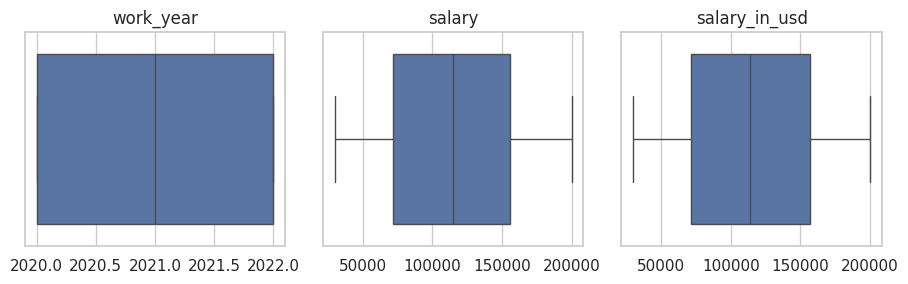

In [ ]:
sns.set(style="whitegrid")

numerical_columns = [col for col in df.columns if df[col].dtype !='object']

num_columns = 5
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

plt.figure(figsize=(num_columns * 3, num_rows * 3))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
for col in num_cols:
  print(f"Column: {col}")
  print(f"Minimum: {df[col].min()}")
  print(f"Maximum: {df[col].max()}")
  print("-" * 20)

Column: work_year
Minimum: 2020
Maximum: 2022
--------------------
Column: salary
Minimum: 30018
Maximum: 199924
--------------------
Column: salary_in_usd
Minimum: 30016
Maximum: 199985
--------------------


Based on the boxplot, there are no data points beyond the whiskers, indicating the absence of outliers in the dataset.

**Encoding and standardization are typically performed after feature engineering.**